In [59]:
import pandas as pd # Data manipulation and analysis.
import numpy as np # Numerical operations and array handling.
import matplotlib.pyplot as plt # More control, lower-level, basic plotting.
import seaborn as sns # Higher-level, more aesthetically pleasing plots.
from scipy import stats # Statistical functions and tests.
from sklearn.preprocessing import MultiLabelBinarizer # For multi-label binarization of categorical features.

pd.set_option('display.max_columns', None) # Display all columns in DataFrame output.
pd.set_option('display.max_rows', None) # Display all rows in DataFrame output.

## 1. Data Preprocessing

### 1.1 Load Data from Dataset

In [60]:
# Load data from dataset
df = pd.read_csv('data/Weather_Dataset.csv')

# Display the first 5 rows
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


### 1.2 Rename Columns
Column names were standardized to lowercase with snake_case formatting for easier use in analysis and modeling.

In [61]:
# Rename columns for consistency
df = df.rename(columns={
    "Date/Time": "date_time",
    "Temp_C": "temperature",
    "Dew Point Temp_C": "dew_point_temperature",
    "Rel Hum_%": "humidity",
    "Wind Speed_km/h": "wind_speed",
    "Visibility_km": "visibility",
    "Press_kPa": "pressure",
    "Weather": "weather"
})

print("Renamed columns:", df.columns.tolist())

Renamed columns: ['date_time', 'temperature', 'dew_point_temperature', 'humidity', 'wind_speed', 'visibility', 'pressure', 'weather']


### 1.3 Check Basic iInformation of Dataset

In [62]:
# The number of rows and columns
df.shape

(8784, 8)

In [63]:
# The information about the DataFrame, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date_time              8784 non-null   object 
 1   temperature            8784 non-null   float64
 2   dew_point_temperature  8784 non-null   float64
 3   humidity               8784 non-null   int64  
 4   wind_speed             8784 non-null   int64  
 5   visibility             8784 non-null   float64
 6   pressure               8784 non-null   float64
 7   weather                8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [64]:
# Summary statistics for numerical columns and categorical columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temperature,8784.0,8.798144,11.687883,-23.30,0.10,9.30,18.80,33.00
dew_point_temperature,8784.0,2.555294,10.883072,-28.50,-5.90,3.30,11.80,24.40
humidity,8784.0,67.431694,16.918881,18.00,56.00,68.00,81.00,100.00
wind_speed,8784.0,14.945469,8.688696,0.00,9.00,13.00,20.00,83.00
visibility,8784.0,27.664447,12.622688,0.20,24.10,25.00,25.00,48.30
pressure,8784.0,101.051623,0.844005,97.52,100.56,101.07,101.59,103.65


### 1.4 Handle Duplicates

In [65]:
# Show all column names
df.columns

Index(['date_time', 'temperature', 'dew_point_temperature', 'humidity',
       'wind_speed', 'visibility', 'pressure', 'weather'],
      dtype='object')

In [66]:
# Check duplicates in each column
for col in df.columns:
    duplicated_count = df[col].duplicated().sum()
    print(f"Column: {col}")
    print(f"Duplicate Count: {duplicated_count}")
    print("*" * 50)

Column: date_time
Duplicate Count: 0
**************************************************
Column: temperature
Duplicate Count: 8251
**************************************************
Column: dew_point_temperature
Duplicate Count: 8295
**************************************************
Column: humidity
Duplicate Count: 8701
**************************************************
Column: wind_speed
Duplicate Count: 8750
**************************************************
Column: visibility
Duplicate Count: 8760
**************************************************
Column: pressure
Duplicate Count: 8266
**************************************************
Column: weather
Duplicate Count: 8734
**************************************************


In [67]:
# Check duplicate rows across all columns
duplicate_all_cols = df[df.duplicated(keep=False)]
print("Total duplicate rows (all columns):", duplicate_all_cols.shape)

Total duplicate rows (all columns): (0, 8)


In [68]:
# For time series, duplicates are often in the datetime column
duplicate_datetime = df[df.duplicated(subset=['date_time'], keep=False)]
print("Duplicate rows based on date_time:", duplicate_datetime.shape)

Duplicate rows based on date_time: (0, 8)


### 1.4.1 Duplicate Check Summary
* **Checked duplicates across all columns**: 0 rows duplicated.
* **Checked duplicates based on date_time**: 0 rows duplicated.

**Conclusion**:

No duplicates were found in the dataset, so no removal of duplicates is necessary.

### 1.5 Handle Irrelavant Data

In [69]:
# Drop constant features (features with only one unique value)
constant_features = [col for col in df.columns if df[col].nunique() == 1]
df = df.drop(columns=constant_features)
print("Dropped constant features:", constant_features)

Dropped constant features: []


In [70]:
# Columns with mostly missing values (e.g., more than x% missing)
threshold = 5
print(f"Total records {df.shape[0]}")
print("*"* 50)
for col in df.columns:
    missing_count = df[col].isnull().sum()
    missing_ratio = (missing_count / df.shape[0]) * 100
    if missing_ratio > threshold:
        print(f"Column: {col} has {missing_count} missing values ({missing_ratio:.2f}%)")
        print("*" * 50)

Total records 8784
**************************************************


In [71]:
# Drop columns with excessive missing values
columns_to_drop = [col for col in df.columns if (df[col].isnull().sum() / df.shape[0]) * 100 > threshold]
df = df.drop(columns=columns_to_drop)
print("Dropped columns with more than", threshold, "% missing values:", columns_to_drop)

Dropped columns with more than 5 % missing values: []


### 1.5.1 Irrelevant Data Summary
* **Dropped constant features**: no constant columns found.
* **Dropped columns with more than 5% missing values**: all columns have acceptable completeness.

**Conclusion**:

No irrelevant columns were removed, so the dataset is already clean in terms of constant features and mostly-missing columns.

### 1.6 Handle Missing Values

In [72]:
# Check which rows/columns have missing data
df_missing_data = df[df.isnull().any(axis=1)]
df_missing_data.shape

(0, 8)

In [73]:
# Display the last few rows with missing data
df_missing_data.tail()

,date_time,temperature,dew_point_temperature,humidity,wind_speed,visibility,pressure,weather


In [74]:
# Identify numerical and categorical columns.
numerical_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: Index(['temperature', 'dew_point_temperature', 'humidity', 'wind_speed',
       'visibility', 'pressure'],
      dtype='object')
Categorical columns: Index(['date_time', 'weather'], dtype='object')


In [75]:
# Get the list of columns with missing values for numerical columns.
missing_numerical_columns = df[numerical_columns].isnull().any()
missing_numerical_columns = missing_numerical_columns[missing_numerical_columns].index
print("Numerical columns with missing values:", missing_numerical_columns.tolist())


Numerical columns with missing values: []


In [76]:
# Get the list of columns with missing values only for categorical columns.
missing_categorical_columns = df[categorical_columns].isnull().any()
missing_categorical_columns = missing_categorical_columns[missing_categorical_columns].index
print("Categorical columns with missing values:", missing_categorical_columns.tolist())

Categorical columns with missing values: []


### 1.6.1 Missing Values Summary
* **Numerical columns with missing values**: no missing values found.
* **Categorical columns with missing values**: no missing values found.

**Conclusion**:

No missing values were found in the dataset, so no handling of missing data is necessary.

### 1.7 Handle outliers

In [77]:
# Apply physical bound for weather-related features
# Define bounds
bounds = {
    "humidity": (0, 100),
    "wind_speed": (0, None),
    "visibility": (0, None),
    "pressure": (85, 110)
}

# Check and print rows that violate bounds
for col, (low, high) in bounds.items():
    invalid = df.copy()
    if low is not None:
        invalid = invalid[invalid[col] < low]
    if high is not None:
        invalid = pd.concat([invalid, df[df[col] > high]])

    if not invalid.empty:
        print(f"\n{col} - Extreme values outside bounds:")
        print(invalid[[col]].head(10))  # show first 10 rows only
        print(f"Total extreme values in {col}: {len(invalid)}")
    else:
        print(f"\n{col} - No extreme values found.")

# Apply clipping after inspection
df["humidity"] = df["humidity"].clip(lower=0, upper=100)
df["wind_speed"] = df["wind_speed"].clip(lower=0)
df["visibility"] = df["visibility"].clip(lower=0)
df["pressure"] = df["pressure"].clip(lower=85, upper=110)

# Check outliers using IQR
numeric_features = numerical_columns
def find_outliers_IQR_method(input_df, variable):
    IQR = input_df[variable].quantile(0.75) - input_df[variable].quantile(0.25)
    lower_limit = input_df[variable].quantile(0.25) - (IQR*1.5)
    upper_limit = input_df[variable].quantile(0.75) + (IQR*1.5)
    outliers = input_df[(input_df[variable] < lower_limit) | (input_df[variable] > upper_limit)]
    return outliers.shape[0], lower_limit, upper_limit

results = []
for feature in numeric_features:
    outlier_count, lower, upper = find_outliers_IQR_method(df, feature)
    results.append([feature, round(lower,2), round(upper,2), outlier_count])

# Convert to DataFrame
outlier_summary = pd.DataFrame(results, columns=["Feature", "Lower Limit", "Upper Limit", "Outliers"])

# Display summary
display(outlier_summary)



humidity - No extreme values found.

wind_speed - No extreme values found.

visibility - No extreme values found.

pressure - No extreme values found.


,Feature,Lower Limit,Upper Limit,Outliers
0,temperature,-27.95,46.85,0
1,dew_point_temperature,-32.45,38.35,0
2,humidity,18.50,118.50,2
3,wind_speed,-7.50,36.50,162
4,visibility,22.75,26.35,3539
5,pressure,99.02,103.14,207


In [78]:
zscore_summary = {}
for feature in numeric_features:
    z_scores = np.abs(stats.zscore(df[feature].dropna()))
    outliers = (z_scores > 3).sum()
    zscore_summary[feature] = outliers
    print(f"{feature}: Outliers detected by Z-score (>3): {outliers}")

# Remove outliers only for temperature and pressure
df_z_cleaned = df.copy()
for feature in ["temperature", "pressure"]:
    z_scores = np.abs(stats.zscore(df_z_cleaned[feature].dropna()))
    df_z_cleaned = df_z_cleaned.loc[z_scores < 3]

temperature: Outliers detected by Z-score (>3): 0
dew_point_temperature: Outliers detected by Z-score (>3): 0
humidity: Outliers detected by Z-score (>3): 0
wind_speed: Outliers detected by Z-score (>3): 71
visibility: Outliers detected by Z-score (>3): 0
pressure: Outliers detected by Z-score (>3): 61


Z-score cleaned dataset (temperature): (8784, 8)
Outliers detected: 0


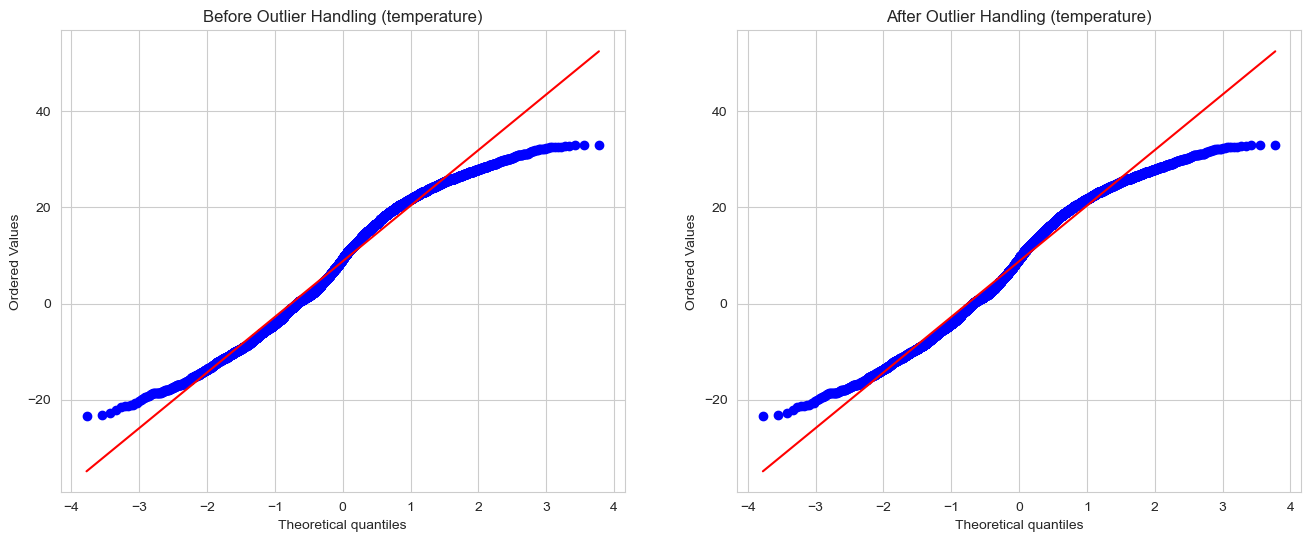

Z-score cleaned dataset (pressure): (8723, 8)
Outliers detected: 61


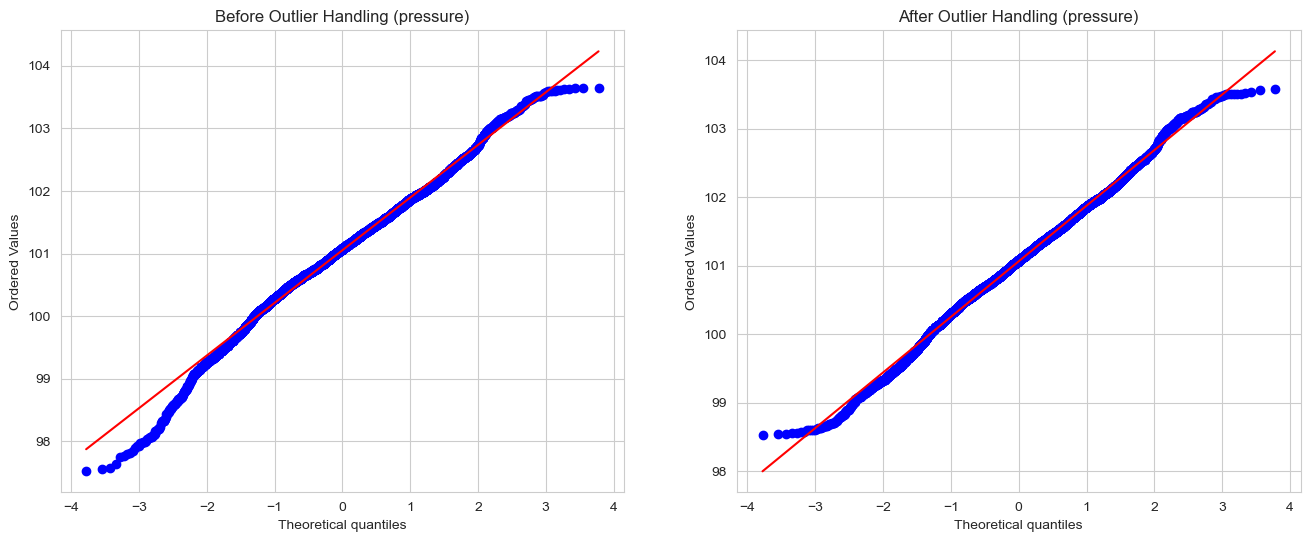

In [79]:
# 2. Check outliers using Z-score
features = ['temperature', 'pressure']
for feature in features:
    z_scores = np.abs(stats.zscore(df[feature].dropna()))
    df_z_cleaned = df[z_scores < 3]

    print(f"Z-score cleaned dataset ({feature}): {df_z_cleaned.shape}")
    print(f"Outliers detected: {len(df) - len(df_z_cleaned)}")

    # Probability plots for before/after
    sns.set_style('whitegrid')
    plt.figure(figsize=(16,6))

    plt.subplot(1, 2, 1)
    stats.probplot(df[feature].dropna(), plot=plt)
    plt.title(f"Before Outlier Handling ({feature})")

    plt.subplot(1, 2, 2)
    stats.probplot(df_z_cleaned[feature].dropna(), plot=plt)
    plt.title(f"After Outlier Handling ({feature})")

    plt.show()

### 1.7.1 Outlier Explanation
Outliers in weather data need to be treated carefully, because extreme values may represent important weather phenomena rather than errors.
We applied physical bounds to correct impossible values (e.g., humidity >100%, negative wind speed).
IQR and Z-score methods were then used to inspect potential outliers. However, in weather data, many “outliers” (such as low visibility, high wind speed, or low pressure) actually represent real weather events like storms or fog. Therefore, we did not remove these values but retained them for further analysis.
Z-score was applied only to temperature and pressure to filter unrealistic sensor errors.

### 1.7.2 Outliers Summary
* **Physical bounds check**: No invalid values were found for humidity, wind speed, visibility, or pressure. All values were within the specified realistic ranges (0–100% humidity, non-negative wind speed and visibility, 85–110 kPa pressure).
* **IQR method**: The method flagged 2 humidity values, 162 wind speed values, 3539 visibility values, and 207 pressure values as outliers. However, many of these represent real weather events (e.g., fog, storms, low pressure) rather than errors, so they were not removed.
* **Z-score method**: Applied to temperature and pressure. No temperature outliers were found. For pressure, 61 outliers were detected and removed as they were unrealistic compared to the normal distribution of values. This helps keep the data distribution closer to normal and avoids distortion from sensor errors.

**Conclusion:**

Physical bounds were applied to ensure no impossible values exist. IQR and Z-score methods were used for inspection. Outliers caused by genuine weather phenomena (e.g., high wind speed, low visibility) were retained, while clearly unrealistic values in pressure were removed.


### 1.8 Weather Condition and Temporal Feature Encoding

The original weather column may contain multiple conditions (e.g., “Freezing Drizzle, Fog”).
Instead of applying full multi-label binarization for all weather types, we created targeted binary flags for key conditions of interest. In particular, we generated an is_rain column (1 = rain present, 0 = no rain) by checking whether the weather description contained any rain-related keywords. This approach simplifies the feature space while retaining relevant information for rainfall analysis.

In [80]:
df['weather_multi'] = df['weather'].str.split(',')

rain_keywords = ['Rain', 'Rain Showers', 'Drizzle', 'Heavy Rain Showers', 'Moderate Rain', 'Moderate Rain Showers']

df['weather_multi'] = df['weather'].str.split(',')

# Create 'is_rain' feature
df['is_rain'] = df['weather_multi'].apply(
    lambda x: int(any(w.strip() in rain_keywords for w in x))
)

# Drop the original 'weather' and 'weather_multi' columns
columns_to_keep = ['date_time', 'temperature', 'dew_point_temperature', 'humidity', 'wind_speed', 'visibility', 'pressure', 'is_rain']
df = df[columns_to_keep]

# Create dewpoint_spread feature
df["dewpoint_spread"] = df["temperature"] - df["dew_point_temperature"]
df.head()

,date_time,temperature,dew_point_temperature,humidity,wind_speed,visibility,pressure,is_rain,dewpoint_spread
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,0,2.1
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,0,1.9
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,0,1.6
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,0,1.7
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,0,1.8


In addition, since the dataset is recorded at an hourly resolution, we enriched the data with temporal features extracted from the date_time column. These include year, quarter, month, week, day, and hour, which allow us to capture seasonal and diurnal patterns in weather behavior. Incorporating these temporal variables provides additional context for exploratory analysis and supports downstream modeling tasks.

In [84]:
# Ensure date_time is in datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

# Extract year
df['year'] = df['date_time'].dt.year

# Extract month (1–12)
df['month'] = df['date_time'].dt.month

# Extract season based on month (1: Spring, 2: Summer, 3: Autumn, 4: Winter)
def get_season(month):
    if month in [12, 1, 2]:
        return 4
    elif month in [3, 4, 5]:
        return 1
    elif month in [6, 7, 8]:
        return 2
    else:  # [9, 10, 11]
        return 3

df['season'] = df['month'].apply(get_season)

# Extract week number (ISO week, 1–52)
df['week'] = df['date_time'].dt.isocalendar().week

# Extract day of the month (1–31)
df['day'] = df['date_time'].dt.day

# Extract hour of the day (0–23)
df['hour'] = df['date_time'].dt.hour

df.head()

,date_time,temperature,dew_point_temperature,humidity,wind_speed,visibility,pressure,is_rain,dewpoint_spread,year,month,season,week,day,hour
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,0,2.1,2012,1,4,52,1,0
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,0,1.9,2012,1,4,52,1,1
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,0,1.6,2012,1,4,52,1,2
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,0,1.7,2012,1,4,52,1,3
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,0,1.8,2012,1,4,52,1,4


## 2. Exploratory Data Analysis (EDA)

### 2.1 Data Structure

In [85]:
# Identify numerical and categorical columns.
numerical_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

df_eda = df.copy()

Numerical columns: Index(['temperature', 'dew_point_temperature', 'humidity', 'wind_speed',
       'visibility', 'pressure', 'is_rain', 'dewpoint_spread', 'year', 'month',
       'season', 'week', 'day', 'hour'],
      dtype='object')
Categorical columns: Index([], dtype='object')


### 2.2 Relationship between Weather Factors and Rainfall
### 2.2.1 Rain Occurrence by Month and Season

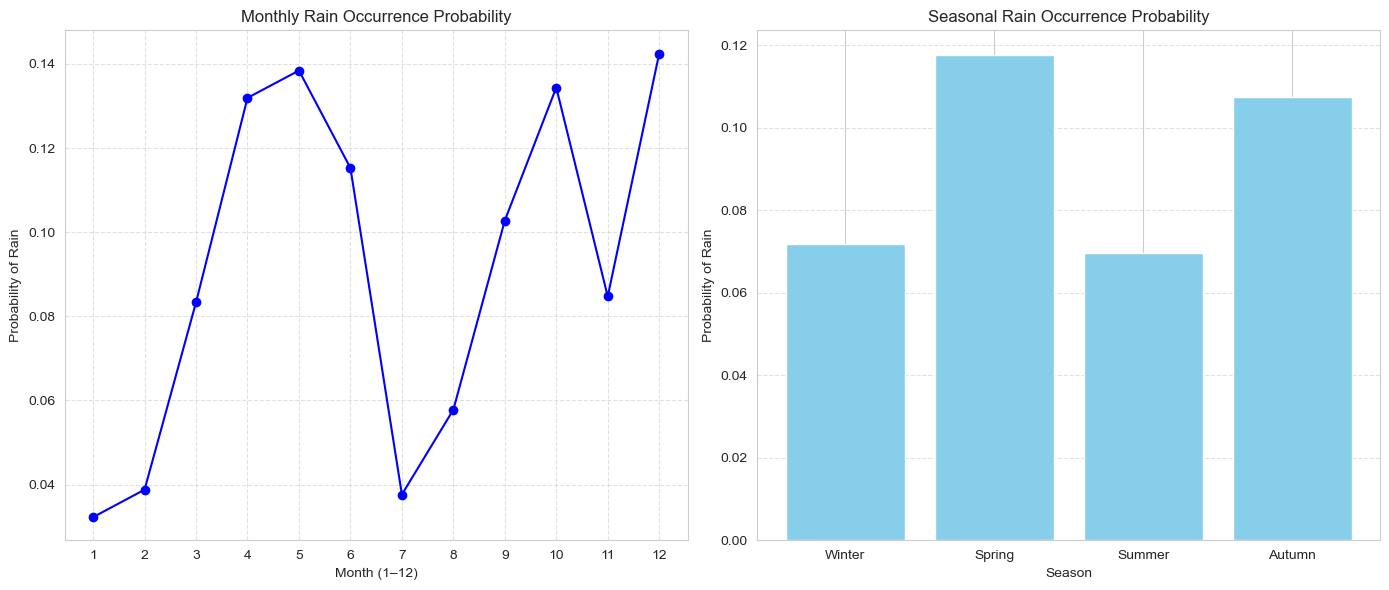

In [86]:
# Monthly rain probability
monthly_rain = df_eda.groupby("month")["is_rain"].mean().reset_index()

# Seasonal rain probability
season_rain = df_eda.groupby("season", as_index=False)["is_rain"].mean()
# Map season numbers to names
season_map = {4: "Winter", 1: "Spring", 2: "Summer", 3: "Autumn"}
season_rain["season"] = season_rain["season"].map(season_map)
# Order seasons
season_order = ["Winter", "Spring", "Summer", "Autumn"]
season_rain["season"] = pd.Categorical(season_rain["season"],
                                       categories=season_order,
                                       ordered=True)
season_rain = season_rain.sort_values("season")

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: Monthly line plot
axes[0].plot(monthly_rain["month"], monthly_rain["is_rain"], marker="o", color="blue")
axes[0].set_title("Monthly Rain Occurrence Probability")
axes[0].set_xlabel("Month (1–12)")
axes[0].set_ylabel("Probability of Rain")
axes[0].set_xticks(range(1, 13))
axes[0].grid(True, linestyle="--", alpha=0.6)

# Right: Seasonal bar chart
axes[1].bar(season_rain["season"], season_rain["is_rain"], color="skyblue")
axes[1].set_title("Seasonal Rain Occurrence Probability")
axes[1].set_xlabel("Season")
axes[1].set_ylabel("Probability of Rain")
axes[1].grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

* The left panel shows the average probability of rain by month for the year 2012, highlighting clear month-to-month differences. Rainfall is more likely in April–June and October–December, while January–February and July–August are relatively drier.
* The right panel aggregates the data by season. It reveals that Spring has the highest probability of rain, followed by Autumn, while Summer and Winter are relatively drier.
* These results confirm that rainfall follows a seasonal pattern, making month or season an important temporal feature to include in downstream modeling.

### 2.2.2 Humidity and Rainfall Prediction

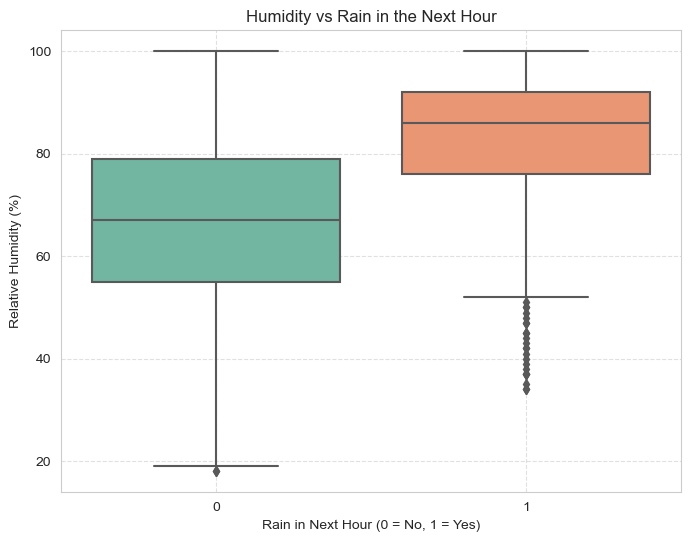

In [87]:
# Create label: next hour rain (shift -1)
df_eda["rain_next_hour"] = df_eda["is_rain"].shift(-1)

# Drop last row (since it has no "next hour")
df_eda = df_eda.dropna(subset=["rain_next_hour"])

# Use relative humidity column
humidity_col = "humidity"  # dataset column name
df_eda["rain_next_hour"] = df_eda["rain_next_hour"].astype(int)

# Plot boxplot of humidity grouped by next hour rain
plt.figure(figsize=(8,6))
sns.boxplot(x="rain_next_hour", y=humidity_col, data=df_eda, palette="Set2")
plt.title("Humidity vs Rain in the Next Hour")
plt.xlabel("Rain in Next Hour (0 = No, 1 = Yes)")
plt.ylabel("Relative Humidity (%)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

* There is a clear difference in humidity distribution depending on whether it rains in the next hour.
* When rain occurs in the following hour, the median humidity is significantly higher (around 85%), while in non-rainy cases it is lower (around 65%).
* The variability of humidity is greater when there is no rain, with values ranging from very low (20%) up to near 100%.
* This suggests that higher humidity is strongly associated with short-term rainfall, making humidity an important predictor feature for modeling rain occurrence.

### 2.2.3 Pressure and Rainfall Prediction

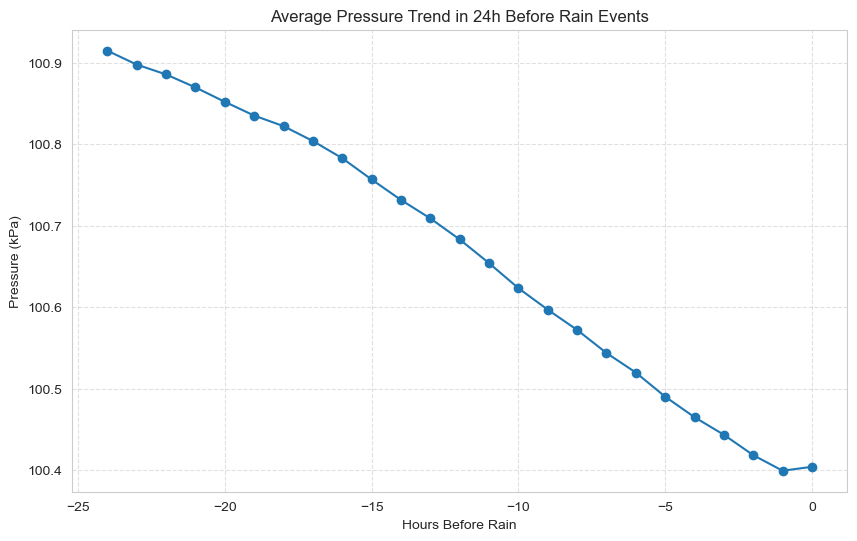

In [88]:
rain_start = df_eda[(df_eda['is_rain'] == 1) & (df_eda['is_rain'].shift(1) == 0)]

window_hours = 24
pressure_traces = []

for ts in rain_start['date_time']:
    start = ts - pd.Timedelta(hours=window_hours)
    segment = df_eda[(df_eda['date_time'] >= start) & (df_eda['date_time'] <= ts)][['date_time','pressure']]
    segment['hour_before_rain'] = (segment['date_time'] - ts).dt.total_seconds()/3600
    pressure_traces.append(segment)

aligned = pd.concat(pressure_traces)
avg_trend = aligned.groupby('hour_before_rain')['pressure'].mean()

# Plot
plt.figure(figsize=(10,6))
plt.plot(avg_trend.index, avg_trend.values, marker="o")
plt.title("Average Pressure Trend in 24h Before Rain Events")
plt.xlabel("Hours Before Rain")
plt.ylabel("Pressure (kPa)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

* There is a clear downward trend in pressure during the 24 hours before rainfall events.
* The average pressure decreases gradually from around 100.9 kPa at -24 hours to about 100.4 kPa at the time of rainfall.
* The decline is steady and consistent, suggesting that falling pressure is a reliable signal preceding rain.
* This supports the meteorological principle that low-pressure systems and pressure drops are strongly associated with rainfall occurrence.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


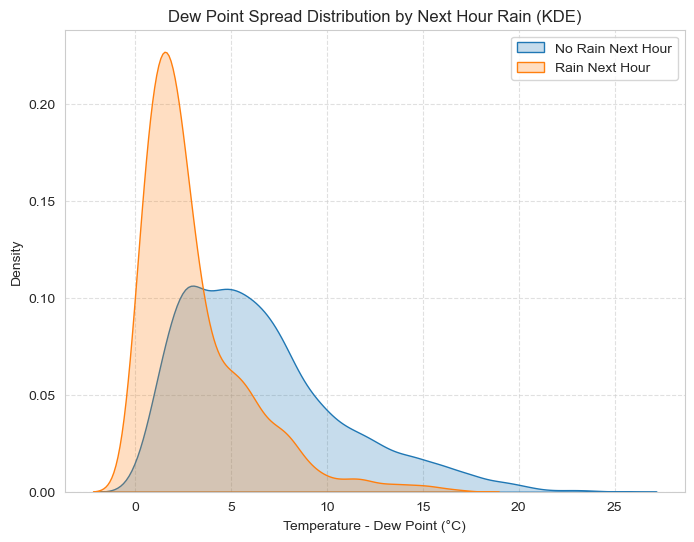

In [89]:
# KDE Plot
plt.figure(figsize=(8,6))
sns.kdeplot(data=df_eda[df_eda["rain_next_hour"]==0]["dewpoint_spread"], label="No Rain Next Hour", fill=True)
sns.kdeplot(data=df_eda[df_eda["rain_next_hour"]==1]["dewpoint_spread"], label="Rain Next Hour", fill=True)
plt.title("Dew Point Spread Distribution by Next Hour Rain (KDE)")
plt.xlabel("Temperature - Dew Point (°C)")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

* During rainy hours (orange), the temperature–dew point spread is tightly concentrated around 0–3°C, indicating near-saturation conditions that favor precipitation.
* In non-rainy hours (blue), the spread is much wider, typically between 5–15°C, reflecting drier air less conducive to rainfall.
* Overall, a smaller temperature–dew point spread strongly correlates with higher rainfall probability, making it a valuable predictor feature.

### 2.2.4 Correlation Heatmap

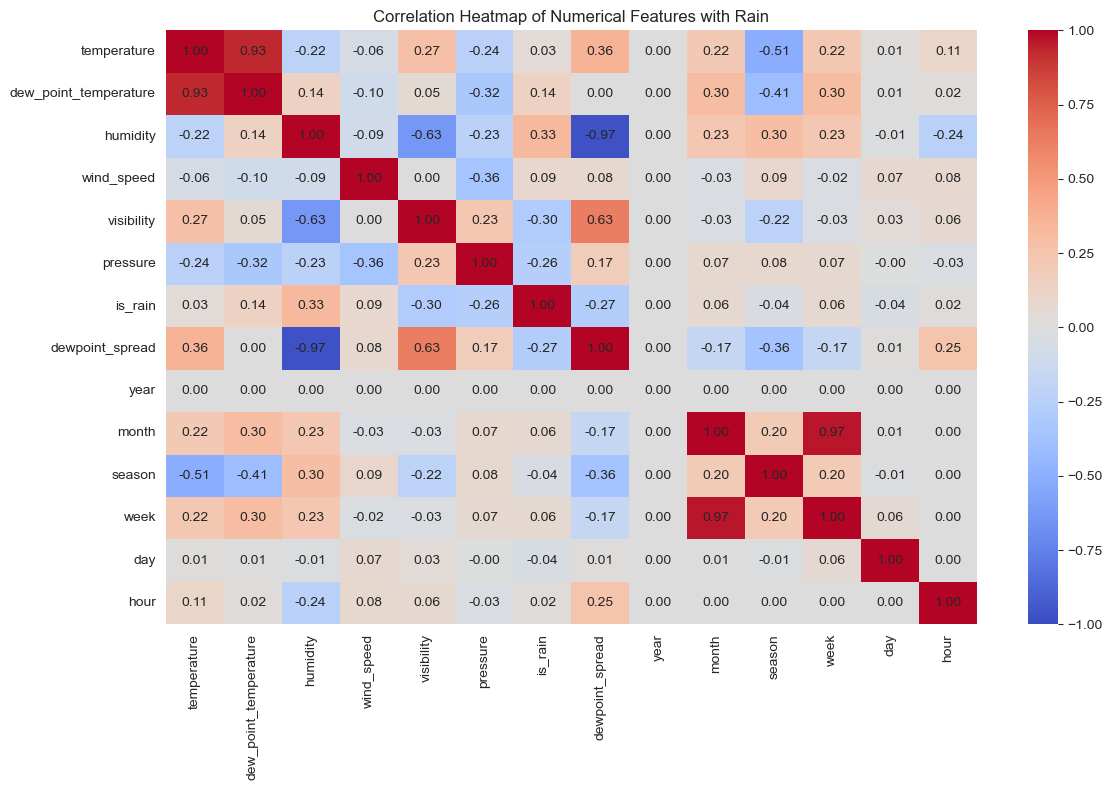

In [90]:
# 1. Correlation Heatmap
numerical_columns = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12,8))
corr = df[numerical_columns].corr().fillna(0)
ax = sns.heatmap(corr, cmap="coolwarm", vmin=-1, vmax=1)
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        ax.text(j + 0.5, i + 0.5, f"{corr.iloc[i, j]:.2f}",
                ha="center", va="center")
plt.title("Correlation Heatmap of Numerical Features with Rain")
plt.tight_layout()
plt.show()

* Humidity shows the strongest positive correlation with rainfall (~0.33), indicating that higher humidity strongly increases the likelihood of rain.
* Visibility has a moderate negative correlation with rainfall (~ -0.30), consistent with the meteorological fact that rainfall reduces visibility.
* Pressure is negatively correlated with rainfall (~ -0.26), suggesting that lower pressure conditions favor precipitation.
* Dewpoint Spread has a moderate negative correlation with rainfall (~ -0.27). A smaller spread means air is closer to saturation, which increases the chance of precipitation.

## 3. Research Question and Discussion

Based on the exploratory data analysis, a potential research question is:
“Can short-term rainfall be accurately predicted using meteorological variables such as humidity, pressure, visibility, and dew point spread?”

The EDA results provide evidence to support this direction. Specifically, humidity shows the strongest positive correlation with rainfall, indicating that higher humidity levels increase the likelihood of rain in the next hour. Visibility and pressure both display negative correlations with rainfall, consistent with the meteorological principle that reduced visibility and falling pressure are associated with precipitation. Additionally, the temperature–dew point spread demonstrates that smaller differences between air temperature and dew point strongly correspond to rainfall events. Seasonal and monthly patterns were also evident, suggesting that time-related features can further enhance predictive power.

This analysis highlights that combining multiple meteorological factors may improve the accuracy of short-term rainfall prediction, which could be explored further using statistical or machine learning models.